<a href="https://colab.research.google.com/github/rush254/covid-tweet-classification/blob/main/Covid_Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Tensorflow/covid_tweets.zip

Archive:  /content/drive/MyDrive/Tensorflow/covid_tweets.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [4]:
train = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')
test = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin1')

In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


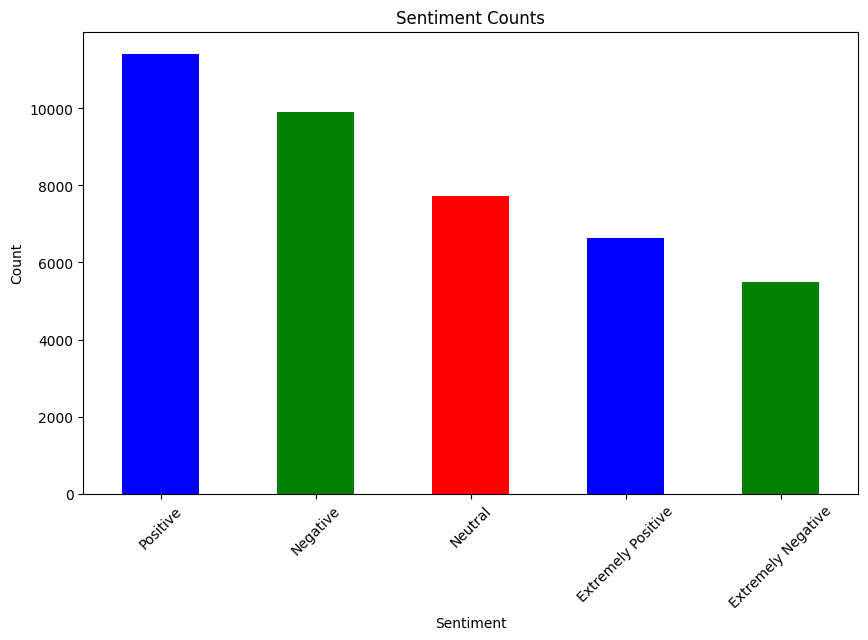

In [6]:
import matplotlib.pyplot as plt
sentiment_counts = train['Sentiment'].value_counts()
# Plotting the sentiment counts
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

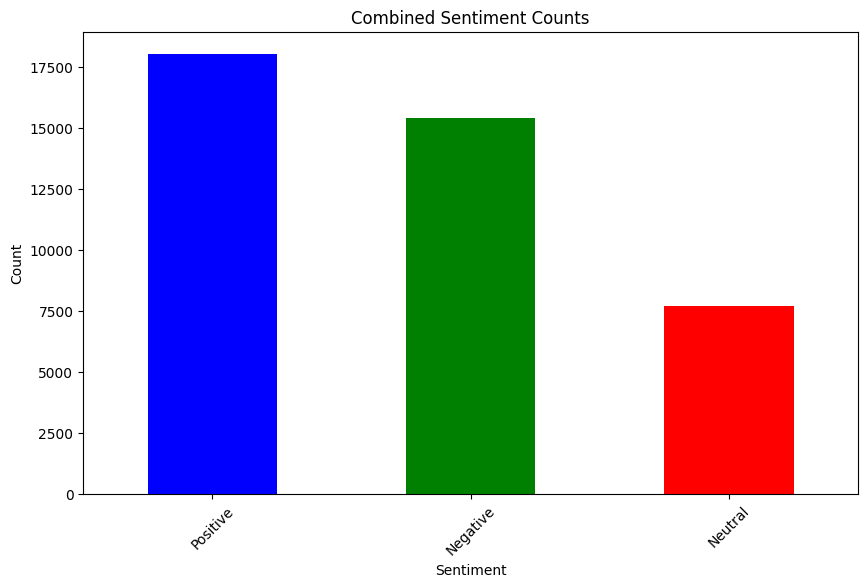

In [7]:
def combine_sentiments(sentiment):
    if sentiment in ["Extremely Positive", "Positive"]:
        return "Positive"
    elif sentiment in ["Extremely Negative", "Negative"]:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to combine sentiments
train['Sentiment'] = train['Sentiment'].apply(combine_sentiments)
test['Sentiment'] = test['Sentiment'].apply(combine_sentiments)

# Get the count of each combined sentiment
combined_sentiment_counts = train['Sentiment'].value_counts()

# Plotting the combined sentiment counts
plt.figure(figsize=(10, 6))
combined_sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Combined Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [8]:
#@title Preprocessing Tweets

import re

def preprocess_tweet(text):
    # Replace numbers with '@'
    text = re.sub(r'\d+', '@', text)

    # Replace URLs with '[WEBSITE]'
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, '[WEBSITE]', text)

    # Remove hashtags, mentions, and other non-alphanumeric characters
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())  # Remove hashtags and other non-alphanumeric characters

    return text

# Apply the preprocessing function to the datasets
train['text'] = train['OriginalTweet'].apply(preprocess_tweet)
test['text'] = test['OriginalTweet'].apply(preprocess_tweet)

In [29]:
train.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
20598,24397,69349,"lagos, NIGERIA",25-03-2020,Prices of consumables and edibles are skyrocke...,Negative,Prices of consumables and edibles are skyrocke...
4755,8554,53506,"City of London, London",18-03-2020,Looked at the stampeding video for grabbing to...,Positive,Looked at the stampeding video for grabbing to...
20078,23877,68829,New Zealand,24-03-2020,Covid 19 coronavirus in NZ: Chicken sparks gan...,Negative,Covid coronavirus in NZ Chicken sparks gang fi...
30017,33816,78768,"Longview, TX",06-04-2020,ÂI was #FoodInsecure for #years. #Affluent pe...,Positive,I was FoodInsecure for years Affluent people m...
9639,13438,58390,NaN,20-03-2020,Paul McNamme Big Issue A universal basic incom...,Negative,Paul McNamme Big Issue A universal basic incom...
39456,43255,88207,Brasil,13-04-2020,Good morning on We hope you re enjoying your w...,Positive,Good morning on We hope you re enjoying your w...
39836,43635,88587,NaN,13-04-2020,The average price of regular gas fell 14 cents...,Negative,The average price of regular gas fell cents in...
383,4182,49134,Russia,16-03-2020,Some thoughts and raw prognosis according to t...,Positive,Some thoughts and raw prognosis according to t...
24624,28423,73375,Punjab,27-03-2020,Imagine if our Trading Standards took the same...,Neutral,Imagine if our Trading Standards took the same...
31584,35383,80335,"Denver, Colorado",07-04-2020,"Like Centennial State craft breweries, local w...",Positive,Like Centennial State craft breweries local wi...


95% interval: 47


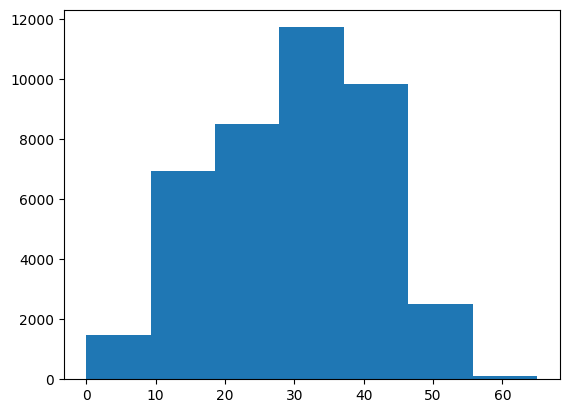

In [10]:
#@title Sentence Length
import matplotlib.pyplot as plt

# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train['text']]

# What's the distribution look like?
plt.hist(sent_lens, bins=7);

print(f'95% interval: {int(np.percentile(sent_lens, 95))}')

In [11]:
#@title Vocab Length

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Concatenate all text data into a single string
all_text = ' '.join(train['text'])

# Tokenize the string into words
words = word_tokenize(all_text)

# Get the total number of unique words
total_unique_words = len(set(words))

print("Total unique words:", total_unique_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Total unique words: 55929


In [33]:
#@title Text Vectorizer

from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=56000, # number of words in vocabulary
                                    output_sequence_length=50) # desired output length of vectorized sequences

text_vectorizer.adapt(train['text'])

In [34]:
#@title Embeddings
from tensorflow.keras import layers

# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),

# token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               mask_zero=True, # Use masking to handle variable sequence lengths (save space)
                               name="token_embedding")


Number of words in vocabulary: 43040


In [35]:
#@title Label Encoding

# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train["Sentiment"].to_numpy())
test_labels_encoded = label_encoder.transform(test["Sentiment"].to_numpy())

# training labels
print(train_labels_encoded)
print(label_encoder.classes_)

[1 2 2 ... 2 1 0]
['Negative' 'Neutral' 'Positive']


In [36]:
#@title TF Datasets
import tensorflow as tf

# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train['text'], train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((test['text'], test_labels_encoded))

# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [37]:
num_classes = 3

In [38]:
#@title Conv1D

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = token_embed(x)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_Conv1D")

# Compile Conv1D model
model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit feature extractor model for 10 epochs
model_1.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=10,
            validation_data=test_dataset,
            validation_steps=int(0.1 * len(test_dataset)))

Epoch 1/10
128/128 [==============================] - 15s 111ms/step - loss: 0.9944 - accuracy: 0.4866 - val_loss: 0.9755 - val_accuracy: 0.4943
Epoch 2/10
128/128 [==============================] - 14s 110ms/step - loss: 0.8330 - accuracy: 0.6260 - val_loss: 0.7921 - val_accuracy: 0.6676
Epoch 3/10
128/128 [==============================] - 13s 100ms/step - loss: 0.6700 - accuracy: 0.7432 - val_loss: 0.6607 - val_accuracy: 0.7670
Epoch 4/10
128/128 [==============================] - 14s 107ms/step - loss: 0.5711 - accuracy: 0.7842 - val_loss: 0.5710 - val_accuracy: 0.7926
Epoch 5/10
128/128 [==============================] - 14s 107ms/step - loss: 0.5223 - accuracy: 0.8154 - val_loss: 0.5912 - val_accuracy: 0.7926
Epoch 6/10
128/128 [==============================] - 13s 100ms/step - loss: 0.4972 - accuracy: 0.8293 - val_loss: 0.5543 - val_accuracy: 0.8182
Epoch 7/10
128/128 [==============================] - 16s 125ms/step - loss: 0.5120 - accuracy: 0.8213 - val_loss: 0.5503 - val_ac

In [43]:
#@title LSTM
# Set random seed and create embedding layer (new embedding layer for each model)
from tensorflow.keras import layers

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = token_embed(x)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit feature extractor model for 3 epochs
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=10,
            validation_data=test_dataset,
            validation_steps=int(0.1 * len(test_dataset)))

Epoch 1/10
128/128 [==============================] - 27s 173ms/step - loss: 0.5566 - accuracy: 0.7893 - val_loss: 0.5804 - val_accuracy: 0.7983
Epoch 2/10
128/128 [==============================] - 19s 146ms/step - loss: 0.2594 - accuracy: 0.9182 - val_loss: 0.6015 - val_accuracy: 0.8182
Epoch 3/10
128/128 [==============================] - 18s 143ms/step - loss: 0.2424 - accuracy: 0.9272 - val_loss: 0.5771 - val_accuracy: 0.8438
Epoch 4/10
128/128 [==============================] - 19s 149ms/step - loss: 0.2199 - accuracy: 0.9302 - val_loss: 0.6944 - val_accuracy: 0.8182
Epoch 5/10
128/128 [==============================] - 19s 151ms/step - loss: 0.2029 - accuracy: 0.9412 - val_loss: 0.6567 - val_accuracy: 0.8295
Epoch 6/10
128/128 [==============================] - 19s 150ms/step - loss: 0.2091 - accuracy: 0.9373 - val_loss: 0.6261 - val_accuracy: 0.8153
Epoch 7/10
128/128 [==============================] - 18s 144ms/step - loss: 0.2136 - accuracy: 0.9326 - val_loss: 0.8471 - val_ac

In [42]:
#@title GRU
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = token_embed(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit feature extractor model for 10 epochs
model_3.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=10,
            validation_data=test_dataset,
            validation_steps=int(0.1 * len(test_dataset)))

Epoch 1/10
128/128 [==============================] - 25s 155ms/step - loss: 0.6806 - accuracy: 0.6975 - val_loss: 0.5670 - val_accuracy: 0.8125
Epoch 2/10
128/128 [==============================] - 17s 135ms/step - loss: 0.3266 - accuracy: 0.8950 - val_loss: 0.5632 - val_accuracy: 0.8011
Epoch 3/10
128/128 [==============================] - 17s 131ms/step - loss: 0.3128 - accuracy: 0.9011 - val_loss: 0.5610 - val_accuracy: 0.8381
Epoch 4/10
128/128 [==============================] - 17s 132ms/step - loss: 0.2705 - accuracy: 0.9158 - val_loss: 0.6199 - val_accuracy: 0.8068
Epoch 5/10
128/128 [==============================] - 17s 134ms/step - loss: 0.2368 - accuracy: 0.9272 - val_loss: 0.6448 - val_accuracy: 0.7926
Epoch 6/10
128/128 [==============================] - 18s 140ms/step - loss: 0.2453 - accuracy: 0.9246 - val_loss: 0.5851 - val_accuracy: 0.8182
Epoch 7/10
128/128 [==============================] - 18s 141ms/step - loss: 0.2424 - accuracy: 0.9236 - val_loss: 0.5499 - val_ac

In [40]:
#@title Bidirectional LSTM

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = token_embed(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit feature extractor model for 10 epochs
model_4.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=10,
            validation_data=test_dataset,
            validation_steps=int(0.1 * len(test_dataset)))

Epoch 1/10
128/128 [==============================] - 35s 209ms/step - loss: 0.7329 - accuracy: 0.6948 - val_loss: 0.6215 - val_accuracy: 0.7756
Epoch 2/10
128/128 [==============================] - 22s 170ms/step - loss: 0.4909 - accuracy: 0.8320 - val_loss: 0.6022 - val_accuracy: 0.7812
Epoch 3/10
128/128 [==============================] - 23s 182ms/step - loss: 0.4278 - accuracy: 0.8499 - val_loss: 0.5331 - val_accuracy: 0.8040
Epoch 4/10
128/128 [==============================] - 22s 175ms/step - loss: 0.3775 - accuracy: 0.8699 - val_loss: 0.5339 - val_accuracy: 0.8097
Epoch 5/10
128/128 [==============================] - 25s 197ms/step - loss: 0.3304 - accuracy: 0.8916 - val_loss: 0.5463 - val_accuracy: 0.8153
Epoch 6/10
128/128 [==============================] - 24s 188ms/step - loss: 0.3195 - accuracy: 0.8960 - val_loss: 0.4963 - val_accuracy: 0.8352
Epoch 7/10
128/128 [==============================] - 22s 174ms/step - loss: 0.3287 - accuracy: 0.8892 - val_loss: 0.4975 - val_ac

In [21]:
#@title Pretrained Embeddings

import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

# Create model using the Sequential API
model_5 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(num_classes, activation="sigmoid")
], name="model_5_USE")

# Compile model
model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
model_5.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=10,
            validation_data=test_dataset,
            validation_steps=int(0.1 * len(test_dataset)))

Epoch 1/10
1287/1287 [==============================] - 29s 20ms/step - loss: 0.7940 - accuracy: 0.6472 - val_loss: 0.8033 - val_accuracy: 0.6330
Epoch 2/10
1287/1287 [==============================] - 27s 21ms/step - loss: 0.7521 - accuracy: 0.6696 - val_loss: 0.7781 - val_accuracy: 0.6567
Epoch 3/10
1287/1287 [==============================] - 24s 19ms/step - loss: 0.7389 - accuracy: 0.6770 - val_loss: 0.7708 - val_accuracy: 0.6569
Epoch 4/10
1287/1287 [==============================] - 27s 21ms/step - loss: 0.7262 - accuracy: 0.6836 - val_loss: 0.7748 - val_accuracy: 0.6524
Epoch 5/10
1287/1287 [==============================] - 24s 19ms/step - loss: 0.7123 - accuracy: 0.6912 - val_loss: 0.7676 - val_accuracy: 0.6638
Epoch 6/10
1287/1287 [==============================] - 22s 17ms/step - loss: 0.6984 - accuracy: 0.7000 - val_loss: 0.7625 - val_accuracy: 0.6664
Epoch 7/10
1287/1287 [==============================] - 20s 16ms/step - loss: 0.6832 - accuracy: 0.7069 - val_loss: 0.7663 -

In [44]:
def evaluate_models(models, train_dataset, test_dataset):

    results = []

    for i, model in enumerate(models):
        # Evaluate on training dataset
        train_loss, train_accuracy = model.evaluate(train_dataset, verbose=0)
        # Evaluate on test dataset
        test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)

        results.append({
            "Model": f"Model_{i+1}",
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy
        })

    results_df = pd.DataFrame(results)
    return results_df

# List of models
models = [model_1, model_2, model_3, model_4, model_5]

# Evaluate models
evaluation_results = evaluate_models(models, train_dataset, test_dataset)

# Display the results
print(evaluation_results)

     Model  Train Accuracy  Test Accuracy
0  Model_1        0.906699       0.819905
1  Model_2        0.943485       0.827804
2  Model_3        0.944116       0.841759
3  Model_4        0.942513       0.844392
4  Model_5        0.746240       0.664560


In [92]:
vis = []

sample = [100, 59, 592, 1126, 2771, 2432]

for i in sample:
  text = test['text'][i]

  sent = test['Sentiment'][i]

  pred = np.argmax(model_4.predict([text]), axis=1)[0]

  prediction = label_encoder.inverse_transform([pred])[0]

  vis.append([text, sent, prediction])

1/1 [==============================] - 0s 96ms/step


In [93]:
vis

[['I have summarized the most important points from the paper in this thread WEBSITE',
  'Positive',
  'Negative'],
 ['Breaking New Jersey officials urge residents to stock up for a two week coronavirus quarantine Just in case COVID WEBSITE',
  'Neutral',
  'Negative'],
 ['Another day another supermarket shelf cleared out of toilet paper Covid Coles Wendouree WEBSITE',
  'Positive',
  'Negative'],
 ['So started this weight loss challenge work hwvr w every grocery store ransacked I don t think I ll have a problem losing weight thanks Covid',
  'Negative',
  'Negative'],
 ['coronavirus be like the end of the world Especially at the grocery store omy TwitterOfTime COVID KeepSafeEveryone pleaselike',
  'Positive',
  'Negative'],
 ['Just going to leave this one here Full story at WEBSITE WEBSITE',
  'Negative',
  'Negative']]